# Quantum Dynamics
## Time-Dependent Schrödinger Equation

We start off with solving the time-dependent schrödinger equation by discretizing the dependent variable $x$, so we instead obtain a matrix equation as following
$$
    H^{N\times N} \Psi^{N\times 1} = i \hbar \frac{d}{dt} \Psi^{N\times 1}
$$
where the superscripts are the matrix dimension.

Then the solution to this equation can be written as 
$$
    \tag{1}
    \vec{\Psi}(t+\Delta{t}) = \mathsf{U}(\Delta{t}) \, \vec{\Psi}(t)
$$
Now if the Hamiltonian matrix $H$ is time-independent, the exact expression for the time-evolution operator is
$$
    \tag{2}
    \mathsf{U}(\Delta{t}) = e^{-i \mathsf{H}\Delta{t}/\hbar}
$$

But for small $\Delta{t}$, the time-evolution operator can be approximated with Taylor expansion of $e$ as
$$
    \mathsf{U}(\Delta{t}) \approx 1 - i\mathsf{H} \, \frac{\Delta{t}}{\hbar}
$$

or more preferably with Cayley's form,
$$
    \tag{3}
    \mathsf{U}(\Delta{t}) \approx \frac{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    }
$$

And substituting this into the solution of the the TDSE, we get
$$
    \tag{4}
    \left( 1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t+\Delta{t}) = 
        \left( 1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t)
$$

Now we need to check that the Eq. (3) is accurate to the second order. We expand Eqs. (1) & (3) as power series in $\Delta{t}$, for the first one we have
$$
    \mathsf{U}(\Delta{t}) = 1 - i\mathsf{H} \, \frac{\Delta{t}}{\hbar}
        + \frac{1}{2} \left( i\mathsf{H} \, \frac{\Delta{t}}{\hbar} \right)^2 - \dots
$$
and for the (3)

$$
    \mathsf{U}(\Delta{t}) \approx \frac{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    } = 
    \left( 1 - \frac{i}{2} \frac{\Delta{t} \mathsf{H}}{\hbar} \right) 
        \left( 1 - \frac{i}{2} \frac{\Delta{t} \mathsf{H}}{\hbar} - \frac{1}{2} \left( \frac{\Delta{t} \mathsf{H}}{\hbar} \right)^2 + \dots \right) \\ = 
    1 - i \frac{\Delta{t} \mathsf{H}}{\hbar} - \frac{1}{2} \left( \frac{\Delta{t} \mathsf{H}}{\hbar} \right)^2 + \dots
$$

which agrees up to the $\Delta{t}^2$

Now to check that $\mathsf{U}$ is unitary matrix, by definition, we require that $\mathsf{U}\mathsf{U}^\dagger = 1$

$$
    \mathsf{U}\mathsf{U}^\dagger = \left( \frac{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    } \right)
    \left( \frac{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    } \right) = 1
$$

## Construct The Hamiltonian Matrix

We construct the the Hamiltonian matrix $\mathsf{H}$ for $N+1 =100$ spatial grid points, and the spatial boundaries with dimensionless length of $\xi = ±10$. With setting, $m=1$, $\omega=1$, and $\hbar=1$.

## Lowest Two Eigenvalues of $\mathsf{H}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh_tridiagonal, solve
from scipy.special import hermite
from scipy.sparse import diags

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')
plt.style.use('seaborn')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (14, 5)
}

In [2]:
m = omega = hbar = 1
Nx = 100
xmin = -10
xmax = 10
dx = (xmax - xmin) / (Nx + 1)

# The second derivative operator
D2 = (
    np.diag([-2] * Nx)
    + np.diag(np.ones(Nx - 1), 1)
    + np.diag(np.ones(Nx - 1), -1)
) / dx**2

# The position operator
X = np.diag(np.linspace(xmin, xmax, Nx))

# The Hamiltonian
H = -1 / (2 * m) * D2 + 1 / 2 * m * omega * X**2

# diagonal elements of H
d = H.diagonal(0)
# above-diagonal elements of H
e = H.diagonal(1)
# Find the eigenvalues and eigenvectors of H
# This algorithm is much faster than using H entirly
eigenvalues, eigenvectors = eigh_tridiagonal(
    d, e, select="i", select_range=(0, 1)
)

# check if the first eigenvector is normalized, which is by default
np.round(np.dot(eigenvectors[:, 0], eigenvectors[:, 0]), 10)

1.0

The exact eigenvalues for the harmonic oscillator are, 
$$
    E_n = \left( n+ \frac{1}{2} \right) \hbar \omega
$$
In the above units, we have $E_0 = 0.5$ and $E_1 = 1.5$

In [3]:
print(f'The first eigenvalue is {eigenvalues[0]:.3f} with error {(eigenvalues[0] - 0.5) / 0.5 *100 :.2f}%')
print(f'The second eigenvalue is {eigenvalues[1]:.3f} with error {(eigenvalues[1] - 1.5) / 1.5 *100 :.2f}%')

The first eigenvalue is 0.509 with error 1.76%
The second eigenvalue is 1.524 with error 1.59%


## Plot The Eigenvector

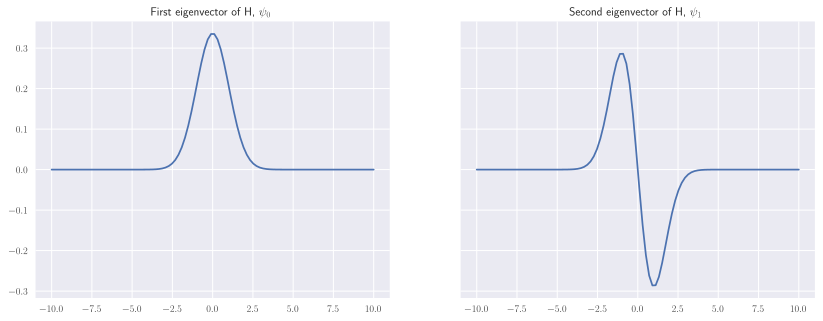

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x = X.diagonal(0)

ax1.plot(x, eigenvectors[:, 0])
ax2.plot(x, eigenvectors[:, 1])
ax1.set_title('First eigenvector of $\mathsf{H}$, $\psi_0$')
ax2.set_title('Second eigenvector of $\mathsf{H}$, $\psi_1$')

plt.show()

## Evolve The Wave Function

Now we need to show an animation of the evolving wave function using (4) from time $t=0$ to $t=4\pi / \omega$.
We will take $\Psi(0)$ to be
$$
    \Psi(0) = \frac{\psi_0 + \psi_1}{\sqrt{2}}
$$
Note for the exp approximation to hold, the time steps should be at least $N_2=100$.

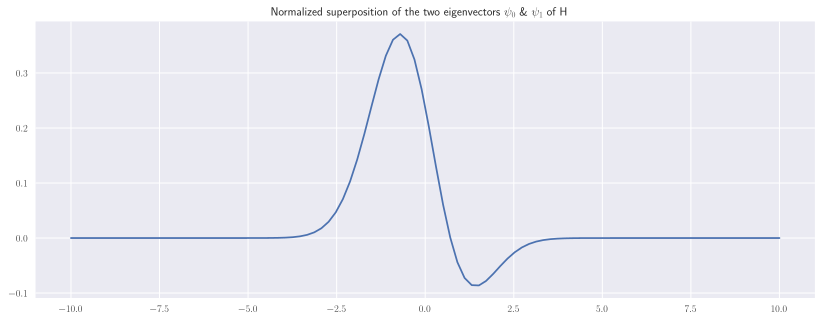

In [5]:
# Taking this if time equals 0
Psi0 = (eigenvectors[:, 0] + eigenvectors[:, 1]) / np.sqrt(2)

plt.plot(x, Psi0)
plt.title('Normalized superposition of the two eigenvectors $\psi_0$ \& $\psi_1$ of $\mathsf{H}$')
plt.show()

### Construct $\mathsf{U}$
From (3) we build the following

In [6]:
Nt = 100
dt = 2 * np.pi / omega / Nt

# The denominator in Cayley’s form
U_plus = np.identity(Nx) + 0.5j * H * dt
# The numerator in Cayley’s form
U_minus = np.identity(Nx) - 0.5j * H * dt

### Solve TDSE
Now we solve numerically the time-dependent Schrödinger equation, that is solving the matrix equation in (4):
$$
    \tag{4}
    \left( 1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t+\Delta{t}) = 
        \left( 1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t)
$$
We imagine it as in the form of
$$
    \mathsf{M} \vec{x} = \vec{b}
$$

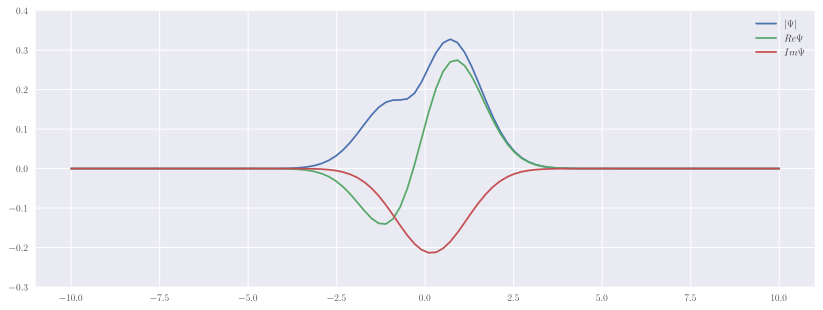

In [9]:
fig, ax = plt.subplots()
t = np.linspace(0, 4 * np.pi / omega, Nt)

(graph1,) = ax.plot(x, np.abs(Psi0), label=r"$|\Psi|$")
(graph2,) = ax.plot(x, np.real(Psi0), label=r"$Re{\Psi}$")
(graph3,) = ax.plot(x, np.imag(Psi0), label=r"$Im{\Psi}$")
ax.set_ylim([-0.3, 0.4])
ax.legend()

# a list of soltion of psi(t)
psi_solutions = [Psi0]


def update(i):
    # solve the linear matrix eq
    b = U_minus @ psi_solutions[i]
    psi_solutions.append(solve(U_plus, b))

    graph1.set_ydata(np.abs(psi_solutions[-1]))
    graph2.set_ydata(np.real(psi_solutions[-1]))
    graph3.set_ydata(np.imag(psi_solutions[-1]))

    return graph1, graph2, graph3


animation = FuncAnimation(
    fig,
    update,
    frames=Nt,
    blit=True,
)
animation.save("evolve_approx.mp4", fps=24, dpi=100)

### Evolve the Exact Solution

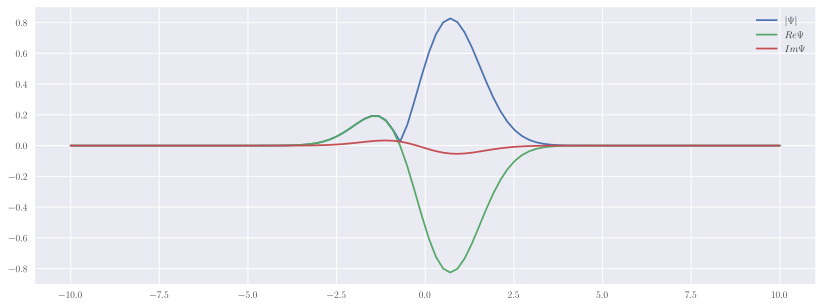

In [10]:
def psi(n, x):
    # The harmonic osillator wavefunction
    return (
        (m * omega / np.pi / hbar) ** 0.25
        * (1 / np.sqrt(2**n * np.prod(np.arange(1, n + 1))))
        * hermite(n)(x)
        * np.exp(-0.5 * ((np.sqrt(m * omega / hbar) * x) ** 2))
    )


def Psi(i):
    # the exact superposition
    return (
        psi0 * np.exp(-0.5j * omega * i * dt)
        + psi1 * np.exp(-1.5j * omega * i * dt)
    ) / np.sqrt(2)


psi0 = psi(0, x)
psi1 = psi(1, x)

fig, ax = plt.subplots()
(graph1,) = ax.plot(x, np.abs(Psi(0)), label=r"$|\Psi|$")
(graph2,) = ax.plot(x, np.real(Psi(0)), label=r"$Re{\Psi}$")
(graph3,) = ax.plot(x, np.imag(Psi(0)), label=r"$Im{\Psi}$")
ax.set_ylim([-0.9, 0.9])
ax.legend()


def update(i):
    graph1.set_ydata(np.abs(Psi(i)))
    graph2.set_ydata(np.real(Psi(i)))
    graph3.set_ydata(np.imag(Psi(i)))

    return graph1, graph2, graph3


animation = FuncAnimation(
    fig,
    update,
    frames=Nt,
    blit=True,
)
animation.save("evolve_exact.mp4", fps=24, dpi=150)